# **Experimentación TP3**

In [11]:
import numpy as np
import matplotlib as plt
import numpy.linalg as lng
from scipy.linalg import lu
from scipy import linalg
import networkx as nx
from scipy.stats.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
import utils 
sns.set_style("whitegrid")
sns.set_palette("tab10")

Probando ejemplos

In [9]:
A = utils.leer_grafo('tests/test_aleatorio.txt')
utils.calcular_ranks('tests/test_aleatorio.txt', 0.76)

(array([0.24074002, 0.21864311, 0.21864311, 0.24074002, 0.08123375]),
 0.07840000000000001)

# **GRAFOS PARTICULARES**

Supernodo

In [10]:
for i in range(10, 51, 10):
    S = utils.armar_grafo_supernodo(i)

Antisupernodo

In [11]:
for i in range(10, 51, 10):
    A = utils.armar_grafo_antisupernodo(i)

Clique

In [13]:
for i in range(10, 51, 10):
    clique = nx.to_numpy_array(nx.complete_graph(i))
    utils.generar_archivo_test_de_matriz("clique"+ str(i) +".txt", clique)

Binomial graph: Cada arista tiene prob p de aparecer 
Este grafo al final no lo usamos porque luego de hacerle la transformación no se hace más denso aunque variamos el valor de p. 

In [14]:
for i in range(1, 9, 1):
    b = nx.binomial_graph(50, i/10, seed = 4, directed= True)
    binomial_graph = nx.to_numpy_array(b).T
    #print(np.mean(binomial_graph))
    utils.generar_archivo_test_de_matriz("binomial_graph50_" + str(i)+ ".txt", binomial_graph)

In [35]:
#Chequeamos que la densidad de la matriz del sistema que resolvemos es siempre igual
from scipy.stats import bernoulli
n = 50
edges = []
for i in range(1,  9, 1):
    p = i/10
    ber_trials = bernoulli.rvs(p, loc=0, size=n*n, random_state=None)
    A = np.array(ber_trials).reshape(n, n)

    edges.append(np.sum(A))
    utils.generar_archivo_test_de_matriz("binomial_graph50_" + str(i)+ ".txt", A)
    sol, den = utils.calcular_ranks_de_matriz(A, 0.60)
    print(den)

0.00824
0.008
0.008
0.008
0.008
0.007999999999999998
0.008
0.008000000000000002


Densificando un grafo: Agrego filas completas a un grafo

In [16]:
n = 50
A = np.zeros(n*n).reshape(n,n)
for i in [10, 20, 30, 40, 50]:
    for j in range(0, i):
        for k in range(0, 50):
            if(j != k ):
                A[j][k] = 1 
    utils.generar_archivo_test_de_matriz("density50_" + str(i)+ ".txt", A)

## **Tiempos - test de la catedra**

Mediciones de tiempo tests de la catedra

In [17]:
utils.results_times("test_aleatorio.txt")

([0.024162016999999997, 0.030657515, 0.044978074],
 [0.000135123396286711, 0.000122808239773775, 0.001223475809412524])

## **Tiempos -nuestros grafos**

supernodo

In [12]:

supernodo10 = utils.read_results_time("test_supernodo_10.txtEG") + utils.read_results_time("test_supernodo_10.txtJac") + utils.read_results_time("test_supernodo_10.txtGS")

supernodo20 = utils.read_results_time("test_supernodo_20.txtEG") + utils.read_results_time("test_supernodo_20.txtJac") + utils.read_results_time("test_supernodo_20.txtGS")

supernodo30 = utils.read_results_time("test_supernodo_30.txtEG") + utils.read_results_time("test_supernodo_30.txtJac") + utils.read_results_time("test_supernodo_30.txtGS")

supernodo40 = utils.read_results_time("test_supernodo_40.txtEG") + utils.read_results_time("test_supernodo_40.txtJac") + utils.read_results_time("test_supernodo_40.txtGS")

supernodo50 = utils.read_results_time("test_supernodo_50.txtEG") + utils.read_results_time("test_supernodo_50.txtJac") + utils.read_results_time("test_supernodo_50.txtGS")

metodos = [i for k in range(0, 5) for i in ["EG", "Jac", "GS"] for j in range(0, 1000) ]

densidad = [i for i in range(10, 51, 10) for j in range(0, 1000) for k in range(0,3)]

resultados = supernodo10 + supernodo20 + supernodo30 + supernodo40 +supernodo50

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}

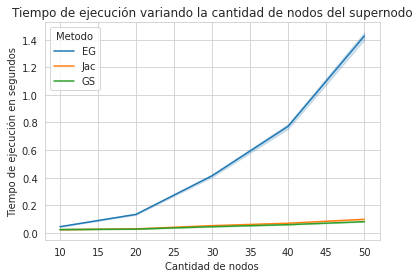

In [13]:

df = pd.DataFrame(data)
sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)
plt.title("Tiempo de ejecución variando la cantidad de nodos del supernodo")
plt.xlabel("Cantidad de nodos")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

antisupernodo

In [14]:
antisupernodo10 = utils.read_results_time("test_antisupernodo_10.txtEG") + utils.read_results_time("test_antisupernodo_10.txtJac") + utils.read_results_time("test_antisupernodo_10.txtGS")

antisupernodo20 = utils.read_results_time("test_antisupernodo_20.txtEG") + utils.read_results_time("test_antisupernodo_20.txtJac") + utils.read_results_time("test_antisupernodo_20.txtGS")

antisupernodo30 = utils.read_results_time("test_antisupernodo_30.txtEG") + utils.read_results_time("test_antisupernodo_30.txtJac") + utils.read_results_time("test_antisupernodo_30.txtGS")

antisupernodo40 = utils.read_results_time("test_antisupernodo_40.txtEG") + utils.read_results_time("test_antisupernodo_40.txtJac") + utils.read_results_time("test_antisupernodo_40.txtGS")

antisupernodo50 = utils.read_results_time("test_antisupernodo_50.txtEG") + utils.read_results_time("test_antisupernodo_50.txtJac") + utils.read_results_time("test_antisupernodo_50.txtGS")



metodos = [i for k in range(0, 5) for i in ["EG", "Jac", "GS"] for j in range(0, 1000) ]

densidad = [i for i in range(10, 51, 10) for j in range(0, 1000) for k in range(0,3)]

resultados = antisupernodo10 + antisupernodo20 + antisupernodo30 + antisupernodo40 + antisupernodo50

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}

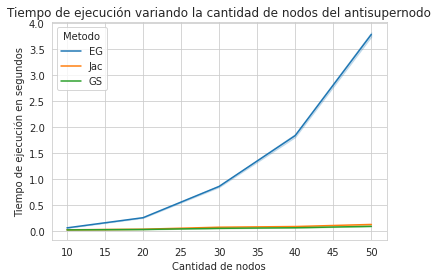

In [15]:
df = pd.DataFrame(data)

sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)

plt.title("Tiempo de ejecución variando la cantidad de nodos del antisupernodo")
plt.xlabel("Cantidad de nodos")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

clique

In [16]:
clique10 = utils.read_results_time("clique10.txtEG") + utils.read_results_time("clique10.txtJac") + utils.read_results_time("clique10.txtGS")

clique20 = utils.read_results_time("clique20.txtEG") + utils.read_results_time("clique20.txtJac") + utils.read_results_time("clique20.txtGS")

clique30 = utils.read_results_time("clique30.txtEG") + utils.read_results_time("clique30.txtJac") + utils.read_results_time("clique30.txtGS")

clique40 = utils.read_results_time("clique40.txtEG") + utils.read_results_time("clique40.txtJac") + utils.read_results_time("clique40.txtGS")

clique50 = utils.read_results_time("clique50.txtEG") + utils.read_results_time("clique50.txtJac") + utils.read_results_time("clique50.txtGS")

metodos = [i for k in range(0, 5) for i in ["EG", "Jac", "GS"] for j in range(0, 1000) ]

densidad = [i for i in range(10, 51, 10) for j in range(0, 1000) for k in range(0,3)]

resultados = clique10 + clique20 + clique30 + clique40 + clique50

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}

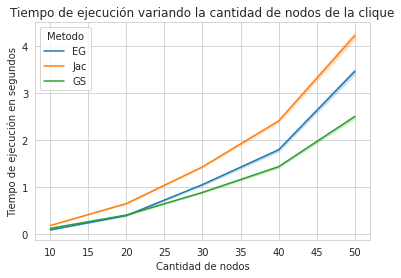

In [17]:
df = pd.DataFrame(data)

sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)

plt.title("Tiempo de ejecución variando la cantidad de nodos de la clique")
plt.xlabel("Cantidad de nodos")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

erdos graph (binomial degree distr)
Decidimos no incluirlo en el informe pq no cambia la densidad del grafo

In [18]:

cant_reps = 1000
resultados = []
densidad = []
for i in [1, 2, 3, 4, 5, 6]:
    n_edges= nx.number_of_edges(nx.binomial_graph(50, i/10, seed = 2, directed= True))
    densidad += [n_edges for j in range(0, 3*cant_reps)]
    resultados += utils.read_results_time("binomial_graph50_"+str(i)+".txtEG")
    resultados += utils.read_results_time("binomial_graph50_"+str(i)+".txtJac")
    resultados += utils.read_results_time("binomial_graph50_"+str(i)+".txtGS")

metodos = [i for k in range(0, 6) for i in ["EG", "Jac", "GS"] for j in range(0, cant_reps) ]

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}

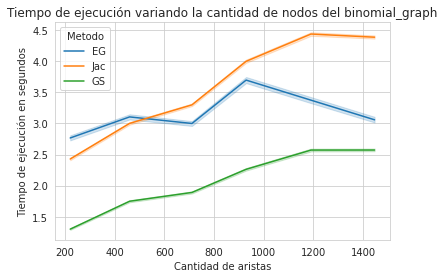

In [19]:
df = pd.DataFrame(data)

sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)

plt.title("Tiempo de ejecución variando la cantidad de nodos del binomial_graph")
plt.xlabel("Cantidad de aristas")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

Agregamos densidad a un grafo completando las filas

In [20]:
cant_reps = 1000
resultados = []
densidad = []
for i in [10, 20, 30, 40, 50]:
    densidad += [i for j in range(0, 3*cant_reps)]
    resultados += utils.read_results_time("density50_"+str(i)+".txtEG")
    resultados += utils.read_results_time("density50_"+str(i)+".txtJac")
    resultados += utils.read_results_time("density50_"+str(i)+".txtGS")

metodos = [i for k in range(0, 5) for i in ["EG", "Jac", "GS"] for j in range(0, cant_reps) ]

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}


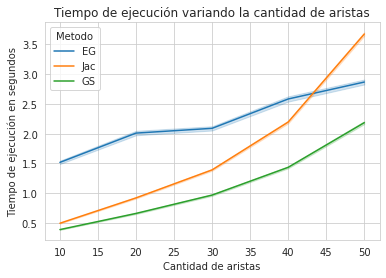

In [21]:
df = pd.DataFrame(data)

sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)

plt.title("Tiempo de ejecución variando la cantidad de aristas")
plt.xlabel("Cantidad de aristas")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

# Análisis de Convergencia

Clique

/tmp/ipykernel_20754/2491987320.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(i) for i in epsilon_base], fontsize = 10)


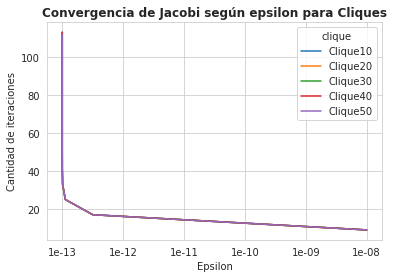

In [23]:
iters = []
epsilon = []
clique = []
epsilon_base = []
for i in range(10, 60, 10):
    iter, eps = utils.read_results_conv("clique" + str(i) + ".txtJac")
    iters += iter
    epsilon += eps
    clique += ["Clique" +str(i) for j in range(0, 14)]
    epsilon_base = epsilon

df = pd.DataFrame(columns=["epsilon", "iters","clique"])

df["epsilon"] =  epsilon
df["iters"] = iters
df[ "clique"] = clique

ax = sns.lineplot(df, x = "epsilon", y = "iters", hue = "clique")
ax.set_xticklabels([str(i) for i in epsilon_base], fontsize = 10)
plt.title("Convergencia de Jacobi según epsilon para Cliques", fontweight="bold")
plt.ylabel("Cantidad de iteraciones")
plt.xlabel("Epsilon")
plt.show()

/tmp/ipykernel_20754/4040859246.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(i) for i in epsilon_base], fontsize = 10)


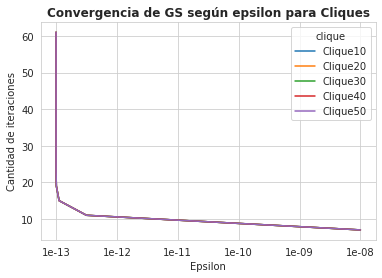

In [25]:
iters = []
epsilon = []
clique = []
epsilon_base = []
for i in range(10, 60, 10):
    iter, eps = utils.read_results_conv("clique" + str(i) + ".txtGS")
    iters += iter
    epsilon += eps
    clique += ["Clique" +str(i) for j in range(0, 14)]
    epsilon_base = epsilon

df = pd.DataFrame(columns=["epsilon", "iters","clique"])

df["epsilon"] =  epsilon
df["iters"] = iters
df[ "clique"] = clique

df = pd.DataFrame(columns=["epsilon", "iters","clique"])

df["epsilon"] =  epsilon
df["iters"] = iters
df[ "clique"] = clique

ax = sns.lineplot(df, x = "epsilon", y = "iters", hue = "clique")
ax.set_xticklabels([str(i) for i in epsilon_base], fontsize = 10)
plt.title("Convergencia de GS según epsilon para Cliques", fontweight="bold")
plt.ylabel("Cantidad de iteraciones")
plt.xlabel("Epsilon")
plt.show()

Supernodo - Comparando Jacovi vs GS

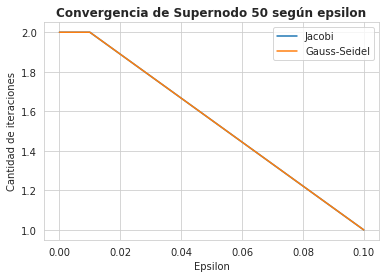

In [33]:
iters1, eps1 = utils.read_results_conv("test_supernodo_50.txtJac")
iters2, eps2 = utils.read_results_conv("test_supernodo_50.txtGS")
plt.plot(eps1, iters1)
plt.plot(eps2, iters2)

plt.legend(["Jacobi", "Gauss-Seidel"])
plt.title("Convergencia de Supernodo 50 según epsilon", fontweight="bold")
plt.ylabel("Cantidad de iteraciones")
plt.xlabel("Epsilon")
plt.show()

Clique - Comparando Jacovi vs GS

/tmp/ipykernel_20754/3965975592.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(i) for i in epsilon_base], fontsize = 10)


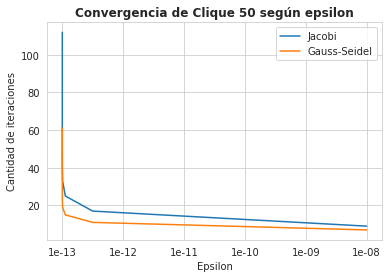

In [29]:
iters1, eps1 = utils.read_results_conv("clique50.txtJac")
iters2, eps2 = utils.read_results_conv("clique50.txtGS")

df = pd.DataFrame(columns=["epsilon", "iters","Metodo"])

df["epsilon"] =  eps1 + eps2
df["iters"] = iters1 + iters2
df[ "Metodo"] = ["Jacobi" for i in range(0, len(iters1))] + ["GS" for i in range(0, len(iters1))]

ax = sns.lineplot(df, x = "epsilon", y = "iters", hue = "Metodo")
ax.set_xticklabels([str(i) for i in epsilon_base], fontsize = 10)
plt.legend(["Jacobi", "Gauss-Seidel"])
plt.title("Convergencia de Clique 50 según epsilon", fontweight="bold")
plt.ylabel("Cantidad de iteraciones")
plt.xlabel("Epsilon")
plt.show()